In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 
# Part 1: Solve the ODE
# 
t = sp.symbols('t', real=True)
R, V, k, rho, c = sp.symbols('R V k rho c', real=True)
T_in, T_room, T_0 = sp.symbols('T_in T_room T_0', real=True)

T = sp.Function('T')

a = R/V + k/(rho*c*V)                       # coef. of T
b = (R/V)*T_in + (k/(rho*c*V))*T_room       # const. term

ODE = sp.Eq(T(t).diff(t) + a*T(t), b)       # 1st order linear
sol = sp.dsolve(ODE, ics = {T(0): T_0})

# sp.pprint(ODE)
# sp.pprint(sol)


In [3]:
# 
# Part 2: Sybolic to Numeric
# 
T_of_t = sol.rhs
func = sp.lambdify((t, R, V, k, rho, c, T_in, T_room, T_0), T_of_t, 'numpy')


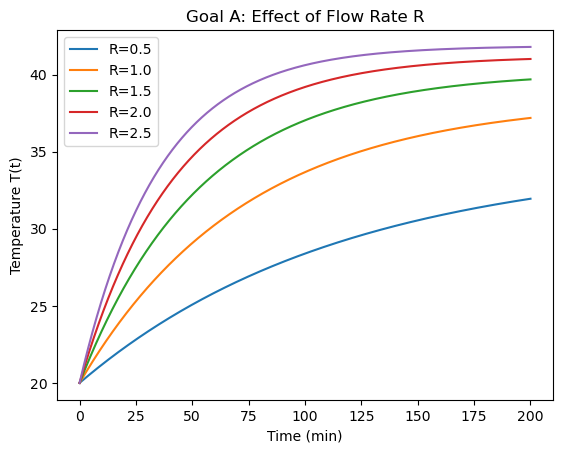

In [4]:
# 
# Goal A: Effect of Flow Rate R
# 
t_values = np.linspace(0, 200, 10000)
R_values = [0.5, 1.0, 1.5, 2.0, 2.5]

def Goal_A(k=1500, rho=1, c=4186, T_in=45, T_room=20, T_0=20):
    for R in R_values:
        plt.plot(t_values, func(t_values, R, 100, k, rho, c, T_in, T_room, T_0),
                 label=f'R={R}')

    plt.legend()
    plt.title('Goal A: Effect of Flow Rate R')
    plt.xlabel('Time (min)')
    plt.ylabel('Temperature T(t)')
    plt.show()

Goal_A()

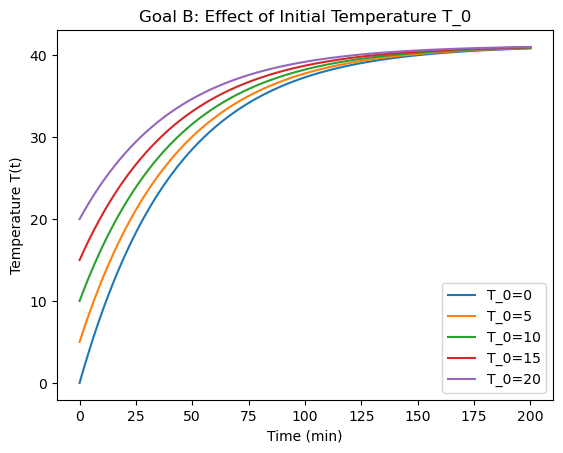

In [5]:
# 
# Goal B: Effect of Initial Temperature T_0
# 
T_0_values = [0, 5, 10, 15, 20]

def Goal_B(R=2, k=1500, rho=1, c=4186, T_in=45, T_room=20):
    for T_0 in T_0_values:
        plt.plot(t_values, func(t_values, R, 100, k, rho, c, T_in, T_room, T_0),
                 label=f'T_0={T_0}')
    
    plt.legend()
    plt.title('Goal B: Effect of Initial Temperature T_0')
    plt.xlabel('Time (min)')
    plt.ylabel('Temperature T(t)')
    plt.show()
    
Goal_B()

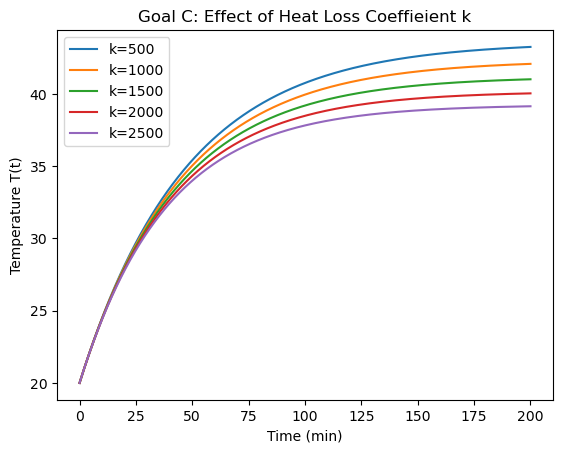

In [6]:
# 
# Goal C: Effect of Heat Loss Coeffieient k
# 
k_values = [500, 1000, 1500, 2000, 2500]

def Goal_C(R=2, rho=1, c=4186, T_in=45, T_room=20, T_0=20):
    for k in k_values:
        plt.plot(t_values, func(t_values, R, 100, k, rho, c, T_in, T_room, T_0),
                 label=f'k={k}')
    
    plt.legend()
    plt.title('Goal C: Effect of Heat Loss Coeffieient k')
    plt.xlabel('Time (min)')
    plt.ylabel('Temperature T(t)')
    plt.show()
    
Goal_C()